In [1]:
import pandas as pd 
import numpy as np

In [2]:
ds = pd.read_csv("IMDb-Movies-India.csv", encoding='latin1')

In [3]:
ds

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ds.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
ds.head(), ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


(                                 Name    Year Duration            Genre  \
 0                                         NaN      NaN            Drama   
 1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
 2                         #Homecoming  (2021)   90 min   Drama, Musical   
 3                             #Yaaram  (2019)  110 min  Comedy, Romance   
 4                   ...And Once Again  (2010)  105 min            Drama   
 
    Rating Votes            Director       Actor 1             Actor 2  \
 0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
 1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
 2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
 3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
 4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   
 
            Actor 3  
 0  Rajendra Bhatia  
 1    Arvind Jangid  
 2       Roy Angana  
 3  Sidd

In [6]:
ds = ds.dropna(subset=['Rating'])

In [7]:
ds['Votes'] = ds['Votes'].str.replace(',', '').astype(float)

C:\Users\adesh\AppData\Local\Temp\ipykernel_13676\3272256776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Votes'] = ds['Votes'].str.replace(',', '').astype(float)


In [8]:
ds['Duration'] = ds['Duration'].str.extract('(\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\adesh\AppData\Local\Temp\ipykernel_13676\3876098877.py:1: SyntaxWarning: invalid escape sequence '\d'
  ds['Duration'] = ds['Duration'].str.extract('(\d+)').astype(float)
C:\Users\adesh\AppData\Local\Temp\ipykernel_13676\3876098877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Duration'] = ds['Duration'].str.extract('(\d+)').astype(float)


In [9]:
ds['Genre'] = ds['Genre'].fillna('Unknown')
ds['Director'] = ds['Director'].fillna('Unknown')
ds['Actor 1'] = ds['Actor 1'].fillna('Unknown')
ds['Actor 2'] = ds['Actor 2'].fillna('Unknown')
ds['Actor 3'] = ds['Actor 3'].fillna('Unknown')
ds['Duration'] = ds['Duration'].fillna(ds['Duration'].median())

C:\Users\adesh\AppData\Local\Temp\ipykernel_13676\1819215520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Genre'] = ds['Genre'].fillna('Unknown')
C:\Users\adesh\AppData\Local\Temp\ipykernel_13676\1819215520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Director'] = ds['Director'].fillna('Unknown')
C:\Users\adesh\AppData\Local\Temp\ipykernel_13676\1819215520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [10]:
ds.head(),ds.info(),ds.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  7919 non-null   float64
 3   Genre     7919 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   float64
 6   Director  7919 non-null   object 
 7   Actor 1   7919 non-null   object 
 8   Actor 2   7919 non-null   object 
 9   Actor 3   7919 non-null   object 
dtypes: float64(3), object(7)
memory usage: 680.5+ KB


(                                 Name    Year  Duration  \
 1  #Gadhvi (He thought he was Gandhi)  (2019)     109.0   
 3                             #Yaaram  (2019)     110.0   
 5                ...Aur Pyaar Ho Gaya  (1997)     147.0   
 6                           ...Yahaan  (2005)     142.0   
 8                  ?: A Question Mark  (2012)      82.0   
 
                        Genre  Rating   Votes        Director          Actor 1  \
 1                      Drama     7.0     8.0   Gaurav Bakshi     Rasika Dugal   
 3            Comedy, Romance     4.4    35.0      Ovais Khan          Prateik   
 5     Comedy, Drama, Musical     4.7   827.0    Rahul Rawail       Bobby Deol   
 6        Drama, Romance, War     7.4  1086.0  Shoojit Sircar  Jimmy Sheirgill   
 8  Horror, Mystery, Thriller     5.6   326.0   Allyson Patel        Yash Dave   
 
                   Actor 2          Actor 3  
 1          Vivek Ghamande    Arvind Jangid  
 3              Ishita Raj  Siddhant Kapoor  
 5  Ai

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
numerical_features = ['Duration', 'Votes']
target = 'Rating'

In [13]:
X = ds[categorical_features + numerical_features]
y = ds[target]

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' 
)

In [15]:
X_encoded = preprocessor.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6335, 12066), (1584, 12066), (6335,), (1584,))

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.set(style="whitegrid", palette="muted")

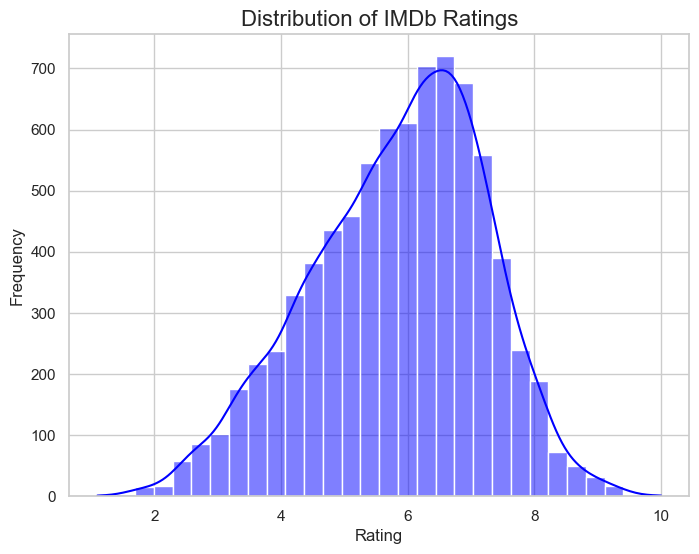

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(ds['Rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of IMDb Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

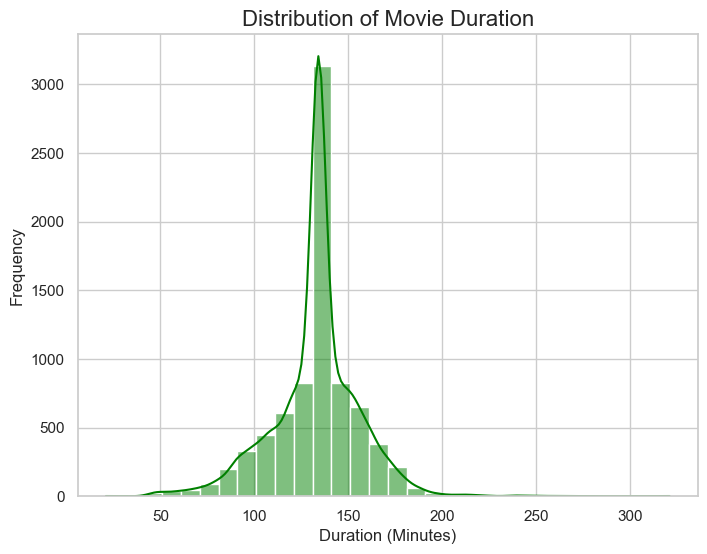

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(ds['Duration'], bins=30, kde=True, color='green')
plt.title('Distribution of Movie Duration', fontsize=16)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

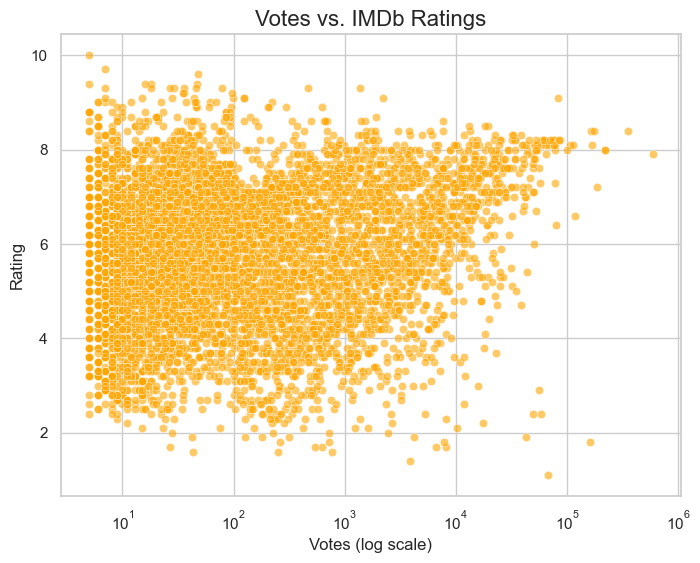

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Rating', data=ds, alpha=0.6, color='orange')
plt.title('Votes vs. IMDb Ratings', fontsize=16)
plt.xlabel('Votes (log scale)', fontsize=12)
plt.xscale('log')
plt.ylabel('Rating', fontsize=12)
plt.show()

C:\Users\adesh\AppData\Local\Temp\ipykernel_13676\1776041805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


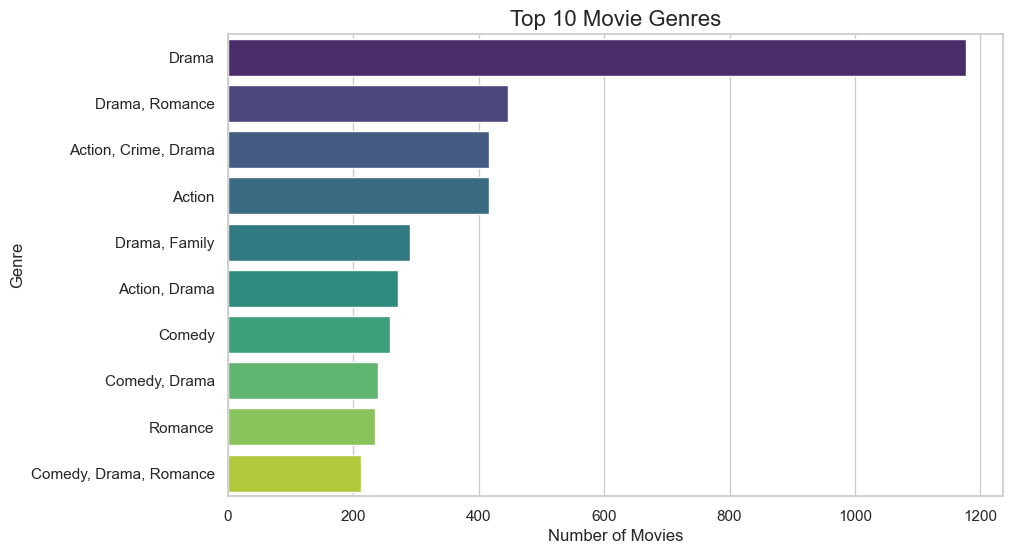

In [23]:
top_genres = ds['Genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title('Top 10 Movie Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

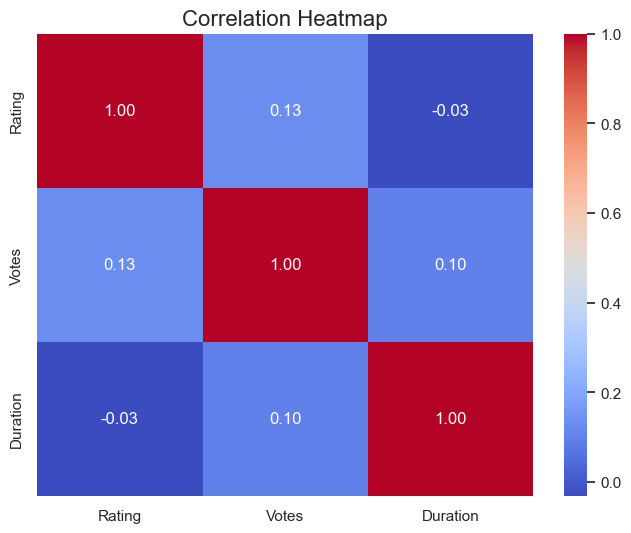

In [24]:
plt.figure(figsize=(8, 6))
corr = ds[['Rating', 'Votes', 'Duration']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()